In [1]:
# load the cleaned diabetes dataset
import pandas as pd
import numpy as np

# load the cleaned diabetes dataset
df = pd.read_csv('diabetes_dataset_cleaned.csv')

In [2]:
# split to traning, cross validation and test set
from sklearn.model_selection import train_test_split

# first split the dataset into training and test set
X = df.drop('TARGET', axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of the training set:', X_train.shape, y_train.shape)
print('Shape of the test set:', X_test.shape, y_test.shape)

Shape of the training set: (736, 13) (736,)
Shape of the test set: (184, 13) (184,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# print the difference between the original and scaled dataset for AGE
print('Original AGE:', X_train['AGE'].values[:5])
print('Scaled AGE:', X_train_scaled[:5, 0])

# print the scaled range of the AGE column
print('Min value of AGE before scaling:', X_train['AGE'].min()) 
print('Max value of AGE before scaling:', X_train['AGE'].max())

print('Min value of AGE after scaling:', X_train_scaled[:, 0].min())
print('Max value of AGE after scaling:', X_train_scaled[:, 0].max())

Original AGE: [60 41 45 50 70]
Scaled AGE: [ 0.9285047  -0.66641113 -0.33063937  0.08907532  1.76793409]
Min value of AGE before scaling: 20
Max value of AGE before scaling: 83
Min value of AGE after scaling: -2.429212836172388
Max value of AGE after scaling: 2.8591922902486315


In [5]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# make predictions
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.967391304347826


In [6]:
# train a random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# make predictions
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9836956521739131


In [7]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.96      1.00      0.98        74

    accuracy                           0.98       184
   macro avg       0.98      0.99      0.98       184
weighted avg       0.98      0.98      0.98       184



In [8]:
from sklearn.metrics import classification_report

y_pred = lr_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       110
           1       0.96      0.96      0.96        74

    accuracy                           0.97       184
   macro avg       0.97      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



In [9]:
# find the most important features
feature_importances = rf_model.feature_importances_
features = X.columns
df_feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importances})
df_feature_importances = df_feature_importances.sort_values('importance', ascending=False)
print(df_feature_importances)

               feature  importance
2         FASTING_BS_T    0.340203
5   ORAL_GLUCOSE_75G_T    0.284312
4        HEAMOGLOBIN_T    0.198285
6           BFAST_BS_T    0.046990
0                  AGE    0.018654
7               Height    0.017851
12  REV_ORAL_GLUCOSE_T    0.017122
3       ORAL_GLUCOSE_T    0.016682
9                  BMI    0.016269
11     WAIST_HIP_RATIO    0.013929
10          HIP_CIRCUM    0.013889
8               Weight    0.013363
1                  SEX    0.002451


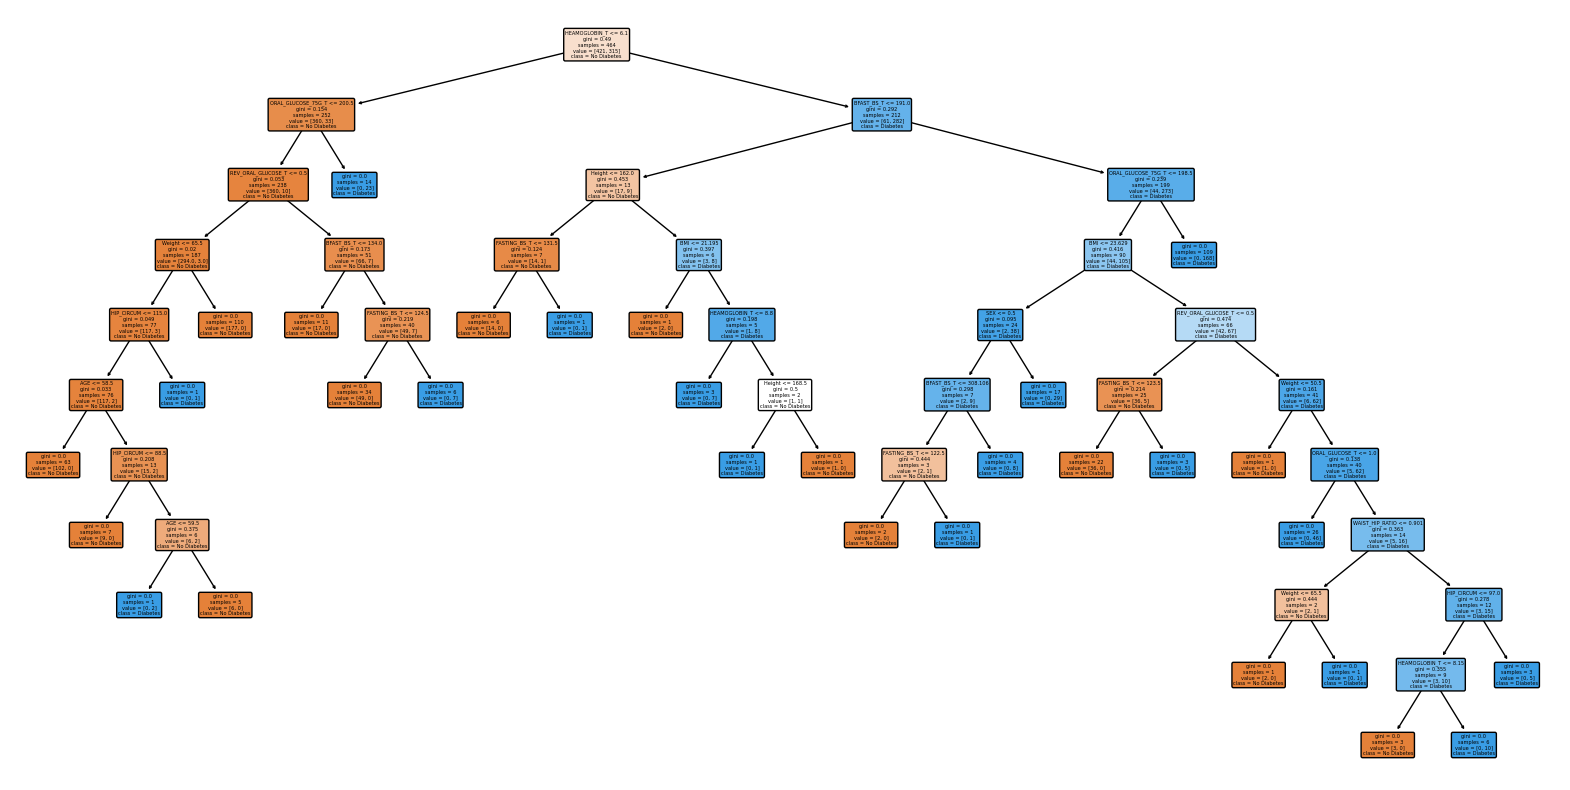

In [10]:
# plot the random forest model graph
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, class_names=['No Diabetes', 'Diabetes'])
plt.show()

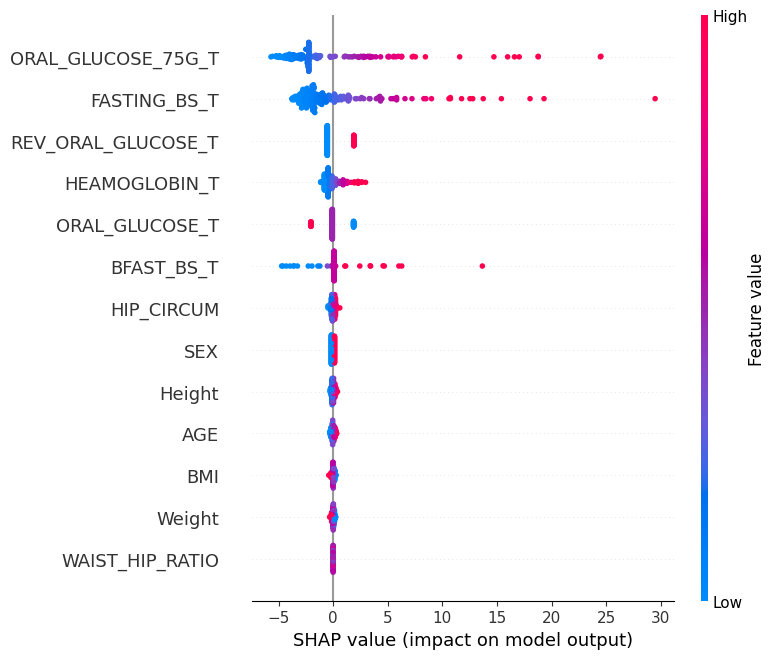

In [11]:
# plot the logistic regression model graph
import shap
explainer = shap.Explainer(lr_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

In [12]:
# save the model
import joblib
import os

joblib.dump(rf_model, 'diabetes_rf_model.pkl')
joblib.dump(lr_model, 'diabetes_lr_model.pkl')

print('Size of the random forest model:', os.path.getsize('diabetes_rf_model.pkl'),'bytes')
print('Size of the logistic regression model:', os.path.getsize('diabetes_lr_model.pkl'),'bytes')

Size of the random forest model: 559737 bytes
Size of the logistic regression model: 965 bytes
